In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Kerela_FINAL_new.csv')
df.set_index('Date', inplace=True)

In [3]:
df.head()

,Tourists,Year,Month,No_of_flight_bookings,No_of_hotel_booked,Tourism,Tourism_Packages,Tourist_Places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min
Date,,,,,,,,,,,,,,,
2010-01-01,818356.0,2010,1,2991,2123306.250,86,82,24,51,78,0,35,6.8313,29.35,15.42
2010-02-01,721201.0,2010,2,2812,1861236.000,89,32,0,44,72,0,35,20.1979,31.79,16.11
2010-03-01,719944.0,2010,3,3136,1797776.875,100,100,33,47,66,0,90,66.8573,33.31,18.42
2010-04-01,735432.0,2010,4,2668,1787449.625,92,85,32,49,65,0,100,94.4786,33.71,20.62
2010-05-01,803431.0,2010,5,2518,1795854.375,100,29,18,54,64,0,56,112.6957,33.06,19.15


In [4]:
# data = df.copy()  # Create a copy of the DataFrame

# month_mapping = {
#     'Jan': 1,
#     'Feb': 2,
#     'Mar': 3,
#     'Apr': 4,
#     'May': 5,
#     'Jun': 6,
#     'Jul': 7,
#     'Aug': 8,
#     'Sep': 9,
#     'Oct': 10,
#     'Nov': 11,
#     'Dec': 12
# }

# data['Month'] = data['Month'].map(month_mapping)
# data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1))
# data.set_index('Date', inplace=True)

In [5]:
# Split your data into training and testing (e.g., use 2010-2018 for training and 2019 for testing)
data=df 
train_data = data['2010-01-01':'2019-12-01']
test_data = data['2017-01-01':'2019-12-01']

In [6]:
# data.info()

In [7]:
data.head()

,Tourists,Year,Month,No_of_flight_bookings,No_of_hotel_booked,Tourism,Tourism_Packages,Tourist_Places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min
Date,,,,,,,,,,,,,,,
2010-01-01,818356.0,2010,1,2991,2123306.250,86,82,24,51,78,0,35,6.8313,29.35,15.42
2010-02-01,721201.0,2010,2,2812,1861236.000,89,32,0,44,72,0,35,20.1979,31.79,16.11
2010-03-01,719944.0,2010,3,3136,1797776.875,100,100,33,47,66,0,90,66.8573,33.31,18.42
2010-04-01,735432.0,2010,4,2668,1787449.625,92,85,32,49,65,0,100,94.4786,33.71,20.62
2010-05-01,803431.0,2010,5,2518,1795854.375,100,29,18,54,64,0,56,112.6957,33.06,19.15


In [8]:
data=data[:108]

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.layers import RNN
from keras.layers import SimpleRNN


In [10]:
# Load the dataset
# data = pd.read_csv("your_data.csv")

# Select the relevant columns
data1 = data[['No_of_flight_bookings', 'No_of_hotel_booked', 'Tourism', 'Tourism_Packages', 'Tourist_Places', 'Travel', 'Food_Drink', 'Flights_Kerala', 'Trains_Kerala', 'Rain', 'T_Max', 'T_Min']]

data2=data[['Tourists']]

# Normalize the data

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data1)
# Define the sequence length and split the data into input sequences and target values
sequence_length = 12  # You can adjust this value

X, y = [], []


for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length, 1:])  # Use iloc to select features from the second column onwards
    y.append(data2.iloc[i + sequence_length, 0])  # Select the "Total Tourists" column as the target

X = np.array(X)
y = np.array(y)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X[:96]
y_train=y[:96]

model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, X.shape[2])))  # Increase the number of LSTM units
model.add(LSTM(100, activation='relu', return_sequences=True))  # Add another LSTM layer with 100 units
model.add(LSTM(50, activation='relu'))  # Add one more LSTM layer with 50 units
model.add(Dense(1))  # Output size is 1 for the "Total Tourists" prediction

# Compile the model
model.compile(optimizer='adam', loss='mse')  # You can choose a different loss function if needed

model.fit(X_train, y_train, epochs=600, batch_size=32)  # You can adjust the number of epochs and batch size

Epoch 1/600
3/3 [==============================] - 7s 44ms/step - loss: 1267212615680.0000
Epoch 2/600
3/3 [==============================] - 0s 38ms/step - loss: 1267212353536.0000
Epoch 3/600
3/3 [==============================] - 0s 39ms/step - loss: 1267212222464.0000
Epoch 4/600
3/3 [==============================] - 0s 39ms/step - loss: 1267211829248.0000
Epoch 5/600
3/3 [==============================] - 0s 40ms/step - loss: 1267210256384.0000
Epoch 6/600
3/3 [==============================] - 0s 38ms/step - loss: 1267202392064.0000
Epoch 7/600
3/3 [==============================] - 0s 43ms/step - loss: 1267130040320.0000
Epoch 8/600
3/3 [==============================] - 0s 45ms/step - loss: 1266602737664.0000
Epoch 9/600
3/3 [==============================] - 0s 48ms/step - loss: 1263257124864.0000
Epoch 10/600
3/3 [==============================] - 0s 45ms/step - loss: 1244085616640.0000
Epoch 11/600
3/3 [==============================] - 0s 48ms/step - loss: 1142340321280.00

3/3 [==============================] - 0s 38ms/step - loss: 10509933568.0000
Epoch 182/600
3/3 [==============================] - 0s 39ms/step - loss: 11182778368.0000
Epoch 183/600
3/3 [==============================] - 0s 44ms/step - loss: 10948312064.0000
Epoch 184/600
3/3 [==============================] - 0s 50ms/step - loss: 10872620032.0000
Epoch 185/600
3/3 [==============================] - 0s 38ms/step - loss: 10515088384.0000
Epoch 186/600
3/3 [==============================] - 0s 53ms/step - loss: 11548279808.0000
Epoch 187/600
3/3 [==============================] - 0s 42ms/step - loss: 10918362112.0000
Epoch 188/600
3/3 [==============================] - 0s 43ms/step - loss: 11541480448.0000
Epoch 189/600
3/3 [==============================] - 0s 46ms/step - loss: 12975931392.0000
Epoch 190/600
3/3 [==============================] - 0s 45ms/step - loss: 10399396864.0000
Epoch 191/600
3/3 [==============================] - 0s 43ms/step - loss: 10876093440.0000
Epoch 192/600

3/3 [==============================] - 0s 42ms/step - loss: 6870089728.0000
Epoch 363/600
3/3 [==============================] - 0s 40ms/step - loss: 6644772352.0000
Epoch 364/600
3/3 [==============================] - 0s 43ms/step - loss: 7078744064.0000
Epoch 365/600
3/3 [==============================] - 0s 40ms/step - loss: 7388362240.0000
Epoch 366/600
3/3 [==============================] - 0s 38ms/step - loss: 7125557248.0000
Epoch 367/600
3/3 [==============================] - 0s 67ms/step - loss: 7336394752.0000
Epoch 368/600
3/3 [==============================] - 0s 44ms/step - loss: 7269038592.0000
Epoch 369/600
3/3 [==============================] - 0s 50ms/step - loss: 6864676352.0000
Epoch 370/600
3/3 [==============================] - 0s 51ms/step - loss: 6970876416.0000
Epoch 371/600
3/3 [==============================] - 0s 47ms/step - loss: 6607493632.0000
Epoch 372/600
3/3 [==============================] - 0s 40ms/step - loss: 6806054400.0000
Epoch 373/600
3/3 [=====

3/3 [==============================] - 0s 55ms/step - loss: 4658071552.0000
Epoch 545/600
3/3 [==============================] - 0s 51ms/step - loss: 5014717952.0000
Epoch 546/600
3/3 [==============================] - 0s 50ms/step - loss: 4388822528.0000
Epoch 547/600
3/3 [==============================] - 0s 54ms/step - loss: 4921332224.0000
Epoch 548/600
3/3 [==============================] - 0s 52ms/step - loss: 4008969984.0000
Epoch 549/600
3/3 [==============================] - 0s 51ms/step - loss: 4291632384.0000
Epoch 550/600
3/3 [==============================] - 0s 54ms/step - loss: 4353673728.0000
Epoch 551/600
3/3 [==============================] - 0s 52ms/step - loss: 4426956800.0000
Epoch 552/600
3/3 [==============================] - 0s 50ms/step - loss: 4790872064.0000
Epoch 553/600
3/3 [==============================] - 0s 48ms/step - loss: 4467899904.0000
Epoch 554/600
3/3 [==============================] - 0s 52ms/step - loss: 4272150784.0000
Epoch 555/600
3/3 [=====

In [11]:
  # Use the last data points from the test set as input    
predictions = model.predict(X[72:96])  # Predict the "Total Tourists" for the next time step

1/1 [==============================] - 1s 1s/step


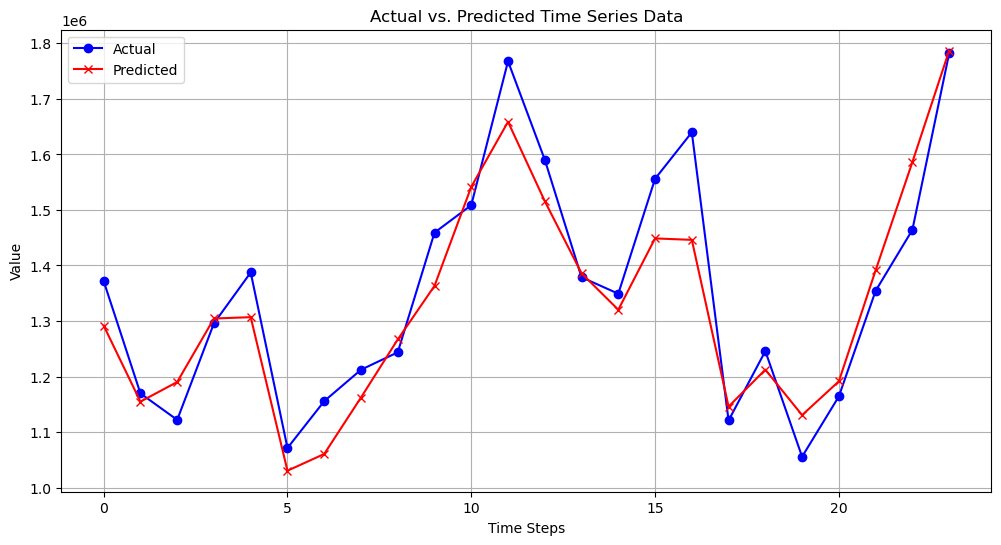

In [12]:
import matplotlib.pyplot as plt

# Inverse transform the actual test data to get it in the original scale

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(y[96:120], label='Actual', color='blue', marker='o')
plt.plot(predictions, label='Predicted', color='red', marker='x')
plt.title('Actual vs. Predicted Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
y[72:96].shape

(24,)

In [14]:
predictions.shape

(24, 1)

In [15]:
y_act2=y[72:96].reshape(24,1)
y_pred2=predictions
import numpy as np

# Calculate MAE (Mean Absolute Error)
mae = np.mean(np.abs(y_act2 - y_pred2))

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((y_act2 - y_pred2) ** 2))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_act2 - y_pred2) / y_act2)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 59804.205729166664
RMSE: 74602.91467922839
MAPE: 4.3478951522783005


In [16]:
y[96:108]

array([], dtype=float64)

In [17]:
y

array([ 872030.,  770512.,  753599.,  779712.,  853926.,  680654.,
        684737.,  776193.,  791985., 1013044.,  987385., 1150663.,
        937791.,  815119.,  803386.,  821615.,  923932.,  724177.,
        722192.,  837464.,  862020., 1122220., 1081390., 1219244.,
       1026830.,  887283.,  865039.,  879626., 1019007.,  774461.,
        769908.,  907513.,  943445., 1183420., 1155608., 1303814.,
       1116473.,  969718.,  939050.,  956550., 1130388.,  831745.,
        826525.,  969382., 1024381., 1246412., 1230830., 1377323.,
       1171592., 1063128., 1007669., 1032072., 1203223.,  893161.,
        899444., 1042686., 1103688., 1311865., 1283466., 1431056.,
       1213770., 1146254., 1067504., 1090943., 1244344.,  928982.,
        970552., 1124432., 1191859., 1419742., 1283775., 1527797.,
       1371882., 1169652., 1122018., 1295885., 1387403., 1071401.,
       1155714., 1212269., 1243659., 1459147., 1508638., 1767722.,
       1590463., 1378781., 1349162., 1556044., 1639759., 11209

In [18]:
import numpy as np

# Assuming y_act1 and y_pred1 are NumPy arrays
y_act1 = np.array([1371882., 1169652., 1122018., 1295885., 1387403., 1071401.,
                   1155714., 1212269., 1243659., 1459147., 1508638., 1767722.,
                   1590463., 1378781., 1349162., 1556044., 1639759., 1120984.,
                   1245862., 1055698., 1164214., 1354291., 1464076., 1781733.])

y_pred1 = np.array([1334964.8, 1126671.8, 1101899.2, 1273052.,
                   1335171.2, 1044277.5, 1109315.6, 1214128.8,
                   1229625.6, 1392470.6, 1517593.6, 1689779.8,
                   1553321.5, 1349165.8, 1300200.4, 1506256.8,
                   1582962.4, 1119057.1, 1195778.6, 1031455.,
                   1113563.1, 1298442.9, 1443975.6, 1733214.9])

# Calculate MAE (Mean Absolute Error)
mae = np.mean(np.abs(y_act1 - y_pred1))

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((y_act1 - y_pred1)**2))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_act1 - y_pred1) / y_act1)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


MAE: 37155.96666666665
RMSE: 42058.99635271269
MAPE: 2.705003119383127


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           44800     
                                                                 
 lstm_1 (LSTM)               (None, 12, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 155,451
Trainable params: 155,451
Non-trainable params: 0
_________________________________________________________________
